# DFE parametrizations

The DFE needs to be parametrized in some way in order to be amenable to maximum likelihood estimation. {class}`~fastdfe.parametrization.GammaExpParametrization` is used by default. Other parametrizations are also implemented (cf. {mod}`~fastdfe.parametrization`). You can also create your own parametrization by subclassing {class}`~fastdfe.parametrization.Parametrization`.

To see how the parametrization affects the shape of the DFE, we use our example data for `B. pendula`.

In [1]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [4.8, 3.3]
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9

import fastdfe as fd
fd.Settings.parallelize = False

In [2]:
import fastdfe as fd
import numpy as np
import logging

# set logging level to only show very important messages
logging.getLogger('fastdfe').setLevel(logging.FATAL)

# the different DFE parametrizations
parametrizations = [
    fd.GammaExpParametrization(),
    fd.DiscreteFractionalParametrization(),
    fd.GammaDiscreteParametrization(),
    fd.DisplacedGammaParametrization()
]

inferences = []
for p in parametrizations:
    # create inference object
    inference = fd.BaseInference(
        sfs_neut=fd.Spectrum([177130, 997, 441, 228, 156, 117, 114, 83, 105, 109, 0]),
        sfs_sel=fd.Spectrum([797939, 1329, 499, 265, 162, 104, 117, 90, 94, 119, 0]),
        fixed_params=dict(all=dict(h=0.5, eps=0)),
        model=p
    )

    # run inference
    inference.run()

    inferences.append(inference)

BaseInference>Bootstrapping (2 runs each): 100%|██████████| 100/100 [00:18<00:00,  5.48it/s]


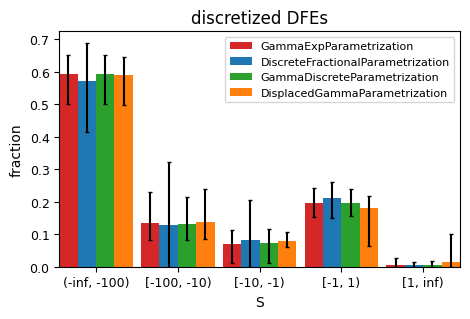

In [3]:
# plot the inferred DFEs
fd.Inference.plot_discretized(
    inferences=inferences,
    labels=[p.__class__.__name__ for p in parametrizations],
    intervals=[-np.inf, -100, -10, -1, 1, np.inf],
);

The overall shape is similar, but {class}~fastdfe.parametrization.DiscreteParametrization shows noticeably wider confidence intervals. In general, estimating the full DFE with a sample size of 10 and the limited SNP count used here leads to substantial uncertainty.